In [3]:
# aivietnam.ai - advertising
import numpy as np
# from numpy import genfromtxt
import matplotlib.pyplot as plt
import random
random.seed(0) # please do not remove this line
%matplotlib inline

def load_data_from_file(fileName = "advertising.csv"):
  data = np.genfromtxt(fileName, dtype=None, delimiter=',', skip_header=1)
  features_X = data[:, :3]
  sales_Y = data[:, 3]

  # **************** your code here ****************
  features_X = np.hstack([np.ones((features_X.shape[0], 1)), features_X])

  return features_X, sales_Y


In [4]:
#Question 2
features_X, _ = load_data_from_file()
print(features_X[:5,:])

[[  1.  230.1  37.8  69.2]
 [  1.   44.5  39.3  45.1]
 [  1.   17.2  45.9  69.3]
 [  1.  151.5  41.3  58.5]
 [  1.  180.8  10.8  58.4]]


In [5]:
#Question 3
_, sales_Y = load_data_from_file()
print(sales_Y.shape)

(200,)


In [16]:
def generate_random_value(bound = 10):
    return (random.random() - 0.5)*bound

def create_individual(n=4, bound=10):

    individual = [generate_random_value(bound) for _ in range(n)]

    return individual

In [17]:
individual = create_individual()
print(individual)

[4.097462559682401, 4.827854760376531, 3.1021723599658957, 4.021659504395827]


In [18]:
def compute_loss(individual):
    theta = np.array(individual)
    y_hat = features_X.dot(theta)
    loss  = np.multiply((y_hat-sales_Y), (y_hat-sales_Y)).mean()
    return loss

def compute_fitness(individual):

    # **************** your code here ****************
    fitness = 1 / compute_loss(individual)
    return fitness

In [19]:
#question 4
features_X, sales_Y = load_data_from_file()
individual = [4.09, 4.82, 3.10, 4.02]
fitness_score = compute_fitness(individual)
print(fitness_score)

1.0186001912541925e-06


In [20]:
def crossover(individual1, individual2, crossover_rate = 0.9):
    individual1_new = individual1.copy()
    individual2_new = individual2.copy()

   # **************** your code here ****************
    for i in range(len(individual1)):
        if random.random() < crossover_rate:
            individual1_new[i], individual2_new[i] = individual2_new[i], individual1_new[i] 

    return individual1_new, individual2_new

In [21]:
#question 5
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]

individual1, individual2 = crossover(individual1, individual2, 2.0)
print("individual1: ", individual1)
print("individual2: ", individual2)

individual1:  [3.44, 2.57, -0.79, -2.41]
individual2:  [4.09, 4.82, 3.1, 4.02]


In [22]:
def mutate(individual, mutation_rate = 0.05):
    individual_m = individual.copy()

    # **************** your code here ****************
    for i in range(len(individual)):
        if random.random() < mutation_rate:
            amount = random.uniform(-1, 1)
            individual_m[i] += amount

    return individual_m

In [23]:
#Question 6
before_individual = [4.09, 4.82, 3.10, 4.02]
after_individual = mutate(individual, mutation_rate = 2.0)
print(before_individual == after_individual)

False


In [24]:
def initializePopulation(m):
  population = [create_individual() for _ in range(m)]
  return population

In [25]:
population = initializePopulation(100)
print(len(population))

100


In [28]:
def selection(sorted_old_population, m):
    index1 = random.randint(0, m-1)
    while True:
        index2 = random.randint(0, m-1)
        if (index2 != index1):
            break

    individual_s = sorted_old_population[index1]
    if index2 > index1:
        individual_s = sorted_old_population[index2]

    return individual_s

In [31]:
population = initializePopulation(m=100)
individual_s = selection(population, m = 100)
print(individual_s)

[3.3842107639465437, -2.804714859819608, -1.1593870262817563, 0.0681316798478615]


In [33]:
def create_new_population(old_population, elitism=2, gen=1):
    m = len(old_population)
    sorted_population = sorted(old_population, key=compute_fitness)

    if gen%1 == 0:
        print("Best loss:", compute_loss(sorted_population[m-1]), "with chromsome: ", sorted_population[m-1])

    new_population = []
    while len(new_population) < m-elitism:
        # selection
         # **************** your code here ****************
        individual1 = selection(sorted_population, m)
        individual2 = selection(sorted_population, m)

        # crossover
        # **************** your code here ****************
        individual1, individual2 = crossover(individual1, individual2, crossover_rate=0.9)
        # mutation
        individual1 = mutate(individual1, mutation_rate = 0.05)
        individual2 = mutate(individual2, mutation_rate = 0.05)
        # **************** your code here ****************
        new_population.append(individual1)
        new_population.append(individual2)
        # copy elitism chromosomes that have best fitness score to the next generation
    for ind in sorted_population[m-elitism:]:
         # **************** your code here ****************
        new_population.append(ind)

    return new_population, compute_loss(sorted_population[m-1])

In [34]:
#Question 7
individual1 = [4.09, 4.82, 3.10, 4.02]
individual2 = [3.44, 2.57, -0.79, -2.41]
old_population = [individual1, individual2]
new_population, _ = create_new_population(old_population, elitism=2, gen=1)


Best loss: 123415.051528805 with chromsome:  [3.44, 2.57, -0.79, -2.41]


In [35]:
def run_GA():
  n_generations = 100
  m = 600
  features_X, sales_Y = load_data_from_file()
  population = initializePopulation(m)
  losses_list = []
  for i in range(n_generations):

    # *********** your code here *************
    population, loss = create_new_population(population, elitism=2, gen=1)
    losses_list.append(loss)
    print("Best loss:", loss, "with chromosome: ", population[m-1])

  return losses_list


In [36]:
losses_list = run_GA()

Best loss: 669.8933449129877 with chromsome:  [-2.722810118211455, 0.1301385759991991, -0.1376453620011786, 0.7176636702453221]
Best loss: 669.8933449129877 with chromosome:  [-2.722810118211455, 0.1301385759991991, -0.1376453620011786, 0.7176636702453221]
Best loss: 669.8933449129877 with chromsome:  [-2.722810118211455, 0.1301385759991991, -0.1376453620011786, 0.7176636702453221]
Best loss: 669.8933449129877 with chromosome:  [-2.722810118211455, 0.1301385759991991, -0.1376453620011786, 0.7176636702453221]
Best loss: 651.4726740016076 with chromsome:  [2.7128771160052922, 0.10392320320055437, -1.1176097449653655, 0.1534091334554275]
Best loss: 651.4726740016076 with chromosome:  [2.7128771160052922, 0.10392320320055437, -1.1176097449653655, 0.1534091334554275]
Best loss: 174.69986028538443 with chromsome:  [3.0367716859918445, -0.03807176590584249, 0.8768402054785598, -0.10258320440823909]
Best loss: 174.69986028538443 with chromosome:  [3.0367716859918445, -0.03807176590584249, 0.87

Best loss: 819.4735373470016 with chromsome:  [-1.3005076277607341, -0.027558066848080154, 0.860400349422703, 0.6375818060301508]
Best loss: 819.4735373470016 with chromosome:  [-1.3005076277607341, -0.027558066848080154, 0.860400349422703, 0.6375818060301508]
Best loss: 819.4735373470016 with chromsome:  [-1.3005076277607341, -0.027558066848080154, 0.860400349422703, 0.6375818060301508]
Best loss: 819.4735373470016 with chromosome:  [-1.3005076277607341, -0.027558066848080154, 0.860400349422703, 0.6375818060301508]
Best loss: 667.3450390290469 with chromsome:  [-1.4591295838721419, 0.2759003300534213, -1.003942272215331, -0.16801938318139364]
Best loss: 667.3450390290469 with chromosome:  [-1.4591295838721419, 0.2759003300534213, -1.003942272215331, -0.16801938318139364]
Best loss: 667.3450390290469 with chromsome:  [-1.4591295838721419, 0.2759003300534213, -1.003942272215331, -0.16801938318139364]
Best loss: 667.3450390290469 with chromosome:  [-1.4591295838721419, 0.2759003300534213

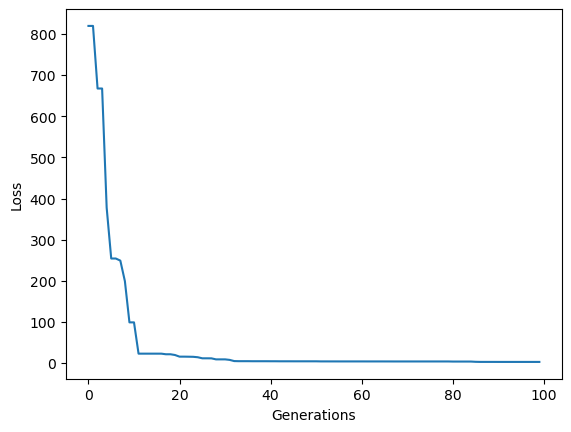

In [38]:
import matplotlib.pyplot as plt

def visualize_loss(losses_list):

      # *********** your code here *************
      plt.plot(losses_list)
      plt.xlabel("Generations")
      plt.ylabel("Loss")
      plt.show()

losses_list = run_GA()
visualize_loss(losses_list)

[4.790465623245286, 0.12710500915889766, -1.536557907978603, -0.50910405152228]


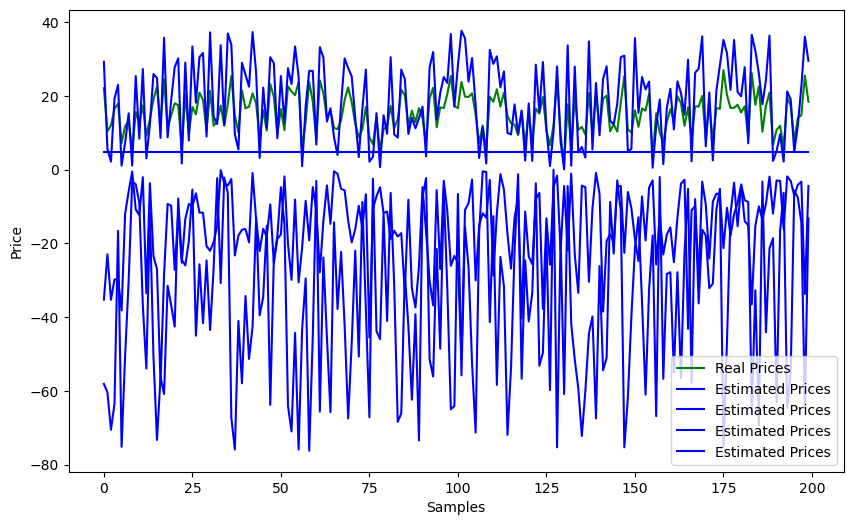

In [39]:
def visualize_predict_gt():
  # visualization of ground truth and predict value
  sorted_population = sorted(population, key=compute_fitness)
  print(sorted_population[-1])
  theta = np.array(sorted_population[-1])

  estimated_prices = []
  for feature in features_X:
     # ************* your code here *************
    estimated_price = [x*c for x, c in zip(feature, theta)]
    estimated_prices.append(estimated_price)

  fig, ax = plt.subplots(figsize=(10, 6))
  plt.xlabel('Samples')
  plt.ylabel('Price')
  plt.plot(sales_Y, c='green', label='Real Prices')
  plt.plot(estimated_prices, c='blue', label='Estimated Prices')
  plt.legend()
  plt.show()

visualize_predict_gt()

[4.790465623245286, 0.12710500915889766, -1.536557907978603, -0.50910405152228]


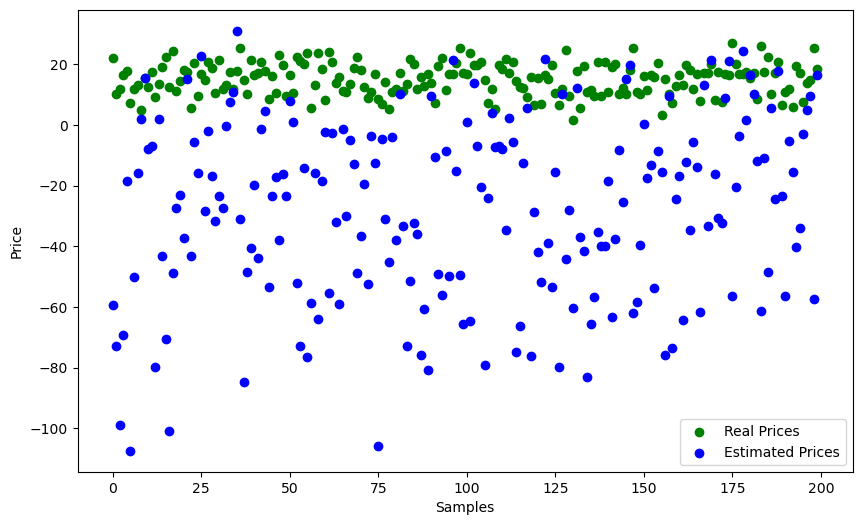

In [40]:
# visualization of ground truth and predict value
sorted_population = sorted(population, key=compute_fitness)
print(sorted_population[-1])
theta = np.array(sorted_population[-1])

estimated_prices = []
samples = [i for i in range(len(features_X))]
for feature in features_X:
    estimated_price = sum(c*x for x, c in zip(feature, theta))
    estimated_prices.append(estimated_price)
fig, ax = plt.subplots(figsize=(10, 6))
# plt.plot(prices, c='green')
# plt.plot(estimated_prices, c='red')
plt.xlabel('Samples')
plt.ylabel('Price')
plt.scatter(samples, sales_Y, c='green', label='Real Prices')
plt.scatter(samples, estimated_prices, c='blue', label='Estimated Prices')
plt.legend()
plt.show()